In [2]:
from scipy.stats import beta
import numpy as np

In [35]:
print((np.arange(10)/9)**(1/0.3), np.linspace(0,1,10)**(1/0.3))
beta.cdf((np.arange(10)/9)**(1/0.3),0.3,1)

[0.00000000e+00 6.59464824e-04 6.64698891e-03 2.56800472e-02
 6.69974500e-02 1.40958623e-01 2.58838656e-01 4.32698213e-01
 6.75291980e-01 1.00000000e+00] [0.00000000e+00 6.59464824e-04 6.64698891e-03 2.56800472e-02
 6.69974500e-02 1.40958623e-01 2.58838656e-01 4.32698213e-01
 6.75291980e-01 1.00000000e+00]


array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

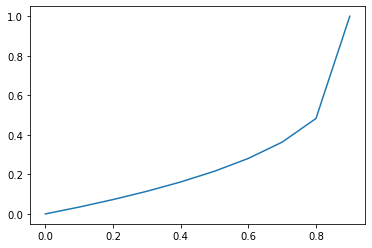

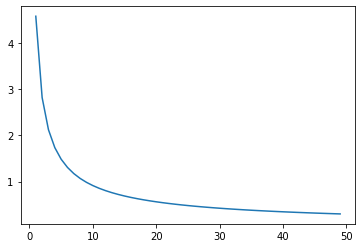

In [29]:
import matplotlib.pyplot as plt

plt.plot(np.arange(10)/10, beta.cdf(np.arange(10)/9, 1, 0.3))
plt.show()
plt.plot(beta.pdf(np.linspace(0,1), 0.3, 1))

In [14]:
xi=[1]
for i in range(10):
    xi.append(xi[-1]/1.1)
np.diff(xi), xi

(array([-0.09090909, -0.08264463, -0.07513148, -0.06830135, -0.06209213,
        -0.05644739, -0.05131581, -0.04665074, -0.04240976, -0.03855433]),
 [1,
  0.9090909090909091,
  0.8264462809917354,
  0.7513148009015777,
  0.6830134553650705,
  0.6209213230591549,
  0.5644739300537771,
  0.5131581182307065,
  0.4665073802097331,
  0.4240976183724846,
  0.3855432894295314])

In [44]:
        dictionary={}
        betas=np.linspace(0,1,10)**(1/0.3)
        dictionary.update({'pi_%.4f'%i:[0.1,2,2] for i in betas})


In [45]:
dictionary.keys()

dict_keys(['pi_0.0000', 'pi_0.0007', 'pi_0.0066', 'pi_0.0257', 'pi_0.0670', 'pi_0.1410', 'pi_0.2588', 'pi_0.4327', 'pi_0.6753', 'pi_1.0000'])

In [43]:
np.linspace(0,1,10)**(1/0.3)

array([0.00000000e+00, 6.59464824e-04, 6.64698891e-03, 2.56800472e-02,
       6.69974500e-02, 1.40958623e-01, 2.58838656e-01, 4.32698213e-01,
       6.75291980e-01, 1.00000000e+00])